# Wave and Wind data processing
in this notebook we are going process and clean the observation of wave and wind measured at Nice, the id of the station is **"00601"** and can be download from this website : "https://candhis.cerema.fr/_public_/cartes.php"

In [ ]:
#installing the necessary dependencies
!pip install -r requirements.txt

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# importing the necessary libraries
# data manipulation lib
import pandas as pd
import numpy as np
import dask.dataframe as dd
# data viz lib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

# Data transformation

In [ ]:
# importing the data
# path to all files
path = "../data/rawdata/Nice/*.csv"
# read all the csv files with dask dataframe and convert to pandas dataframe with compute function
wave_raw = dd.read_csv(path, sep=";").compute()
wave_raw

,DateHeure,H13D,H110D,HMAXD,HSIGMA,HRMSD,H2%D,TH13D,TH110D,TAVGD,...,HM0_S4,TP_S4,T02_S4,TE_S4,EPS2_S4,KAPA_S4,THETAP_S4,THETAM_S4,SIGMAP_S4,SIGMAM_S4
0,2002-06-04 14:00:00,0.43,0.55,0.73,0.52,0.31,0.62,3.2,3.3,2.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-06-04 15:00:00,0.72,0.92,1.53,0.83,0.52,1.04,3.7,3.7,3.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-06-04 16:00:00,0.94,1.16,2.27,1.06,0.68,1.24,4.1,4.1,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-06-04 17:00:00,0.96,1.20,1.71,1.07,0.69,1.32,4.4,4.6,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-06-04 18:00:00,0.96,1.24,2.47,1.07,0.68,1.29,4.4,4.4,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,2016-03-07 06:00:00,0.55,0.67,0.88,0.59,0.39,0.80,6.8,7.0,5.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2210,2016-03-07 06:30:00,0.51,0.64,0.77,0.56,0.37,0.72,6.8,6.8,5.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2211,2016-03-07 07:00:00,0.51,0.65,0.83,0.55,0.36,0.69,6.9,6.9,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2212,2016-03-07 07:30:00,0.49,0.61,0.81,0.54,0.35,0.65,6.7,6.9,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
wave_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111080 entries, 0 to 2213
Data columns (total 73 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   DateHeure  111080 non-null  object 
 1   H13D       111080 non-null  float64
 2   H110D      111080 non-null  float64
 3   HMAXD      111080 non-null  float64
 4   HSIGMA     111080 non-null  float64
 5   HRMSD      111080 non-null  float64
 6   H2%D       111080 non-null  float64
 7   TH13D      111080 non-null  float64
 8   TH110D     111080 non-null  float64
 9   TAVGD      111080 non-null  float64
 10  THMAXD     111080 non-null  float64
 11  TMAXD      111080 non-null  float64
 12  ETAMAX     111080 non-null  float64
 13  ETAMIN     111080 non-null  float64
 14  SZ13D      111080 non-null  float64
 15  SZMAXD     111080 non-null  float64
 16  TSZMAXD    111080 non-null  float64
 17  NBRE_VAG   111080 non-null  int64  
 18  SKEW       111080 non-null  float64
 19  KURT       111080 non-nul

In [ ]:
# we see that multiple columns doesn't have any observations
# we are going to select the columns that are interesting for us
col_sel = ["DateHeure","ETAMAX", "ETAMIN", "HM0", "TP", "T02", "TE"]
wave_df = wave_raw.loc[:,col_sel].copy()

# Data Cleaning

In [ ]:
#we need to convert the time column
wave_df["DateHeure"] = pd.to_datetime(wave_df["DateHeure"])
wave_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111080 entries, 0 to 2213
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   DateHeure  111080 non-null  datetime64[ns]
 1   ETAMAX     111080 non-null  float64       
 2   ETAMIN     111080 non-null  float64       
 3   HM0        111080 non-null  float64       
 4   TP         111080 non-null  float64       
 5   T02        111080 non-null  float64       
 6   TE         111080 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 6.8 MB


In [ ]:
wave_df

,DateHeure,ETAMAX,ETAMIN,HM0,TP,T02,TE
0,2002-06-04 14:00:00,0.47,0.49,0.48,3.2,3.0,3.5
1,2002-06-04 15:00:00,0.83,0.71,0.80,3.9,3.4,3.7
2,2002-06-04 16:00:00,1.31,0.96,1.03,4.4,3.7,4.0
3,2002-06-04 17:00:00,0.91,0.98,1.04,4.7,3.9,4.3
4,2002-06-04 18:00:00,1.51,1.10,1.03,4.7,3.8,4.2
...,...,...,...,...,...,...,...
2209,2016-03-07 06:00:00,0.47,0.52,0.59,6.9,5.8,6.8
2210,2016-03-07 06:30:00,0.49,0.48,0.56,8.3,5.5,6.6
2211,2016-03-07 07:00:00,0.44,0.42,0.55,8.3,5.7,6.8
2212,2016-03-07 07:30:00,0.47,0.43,0.53,8.6,5.6,6.7


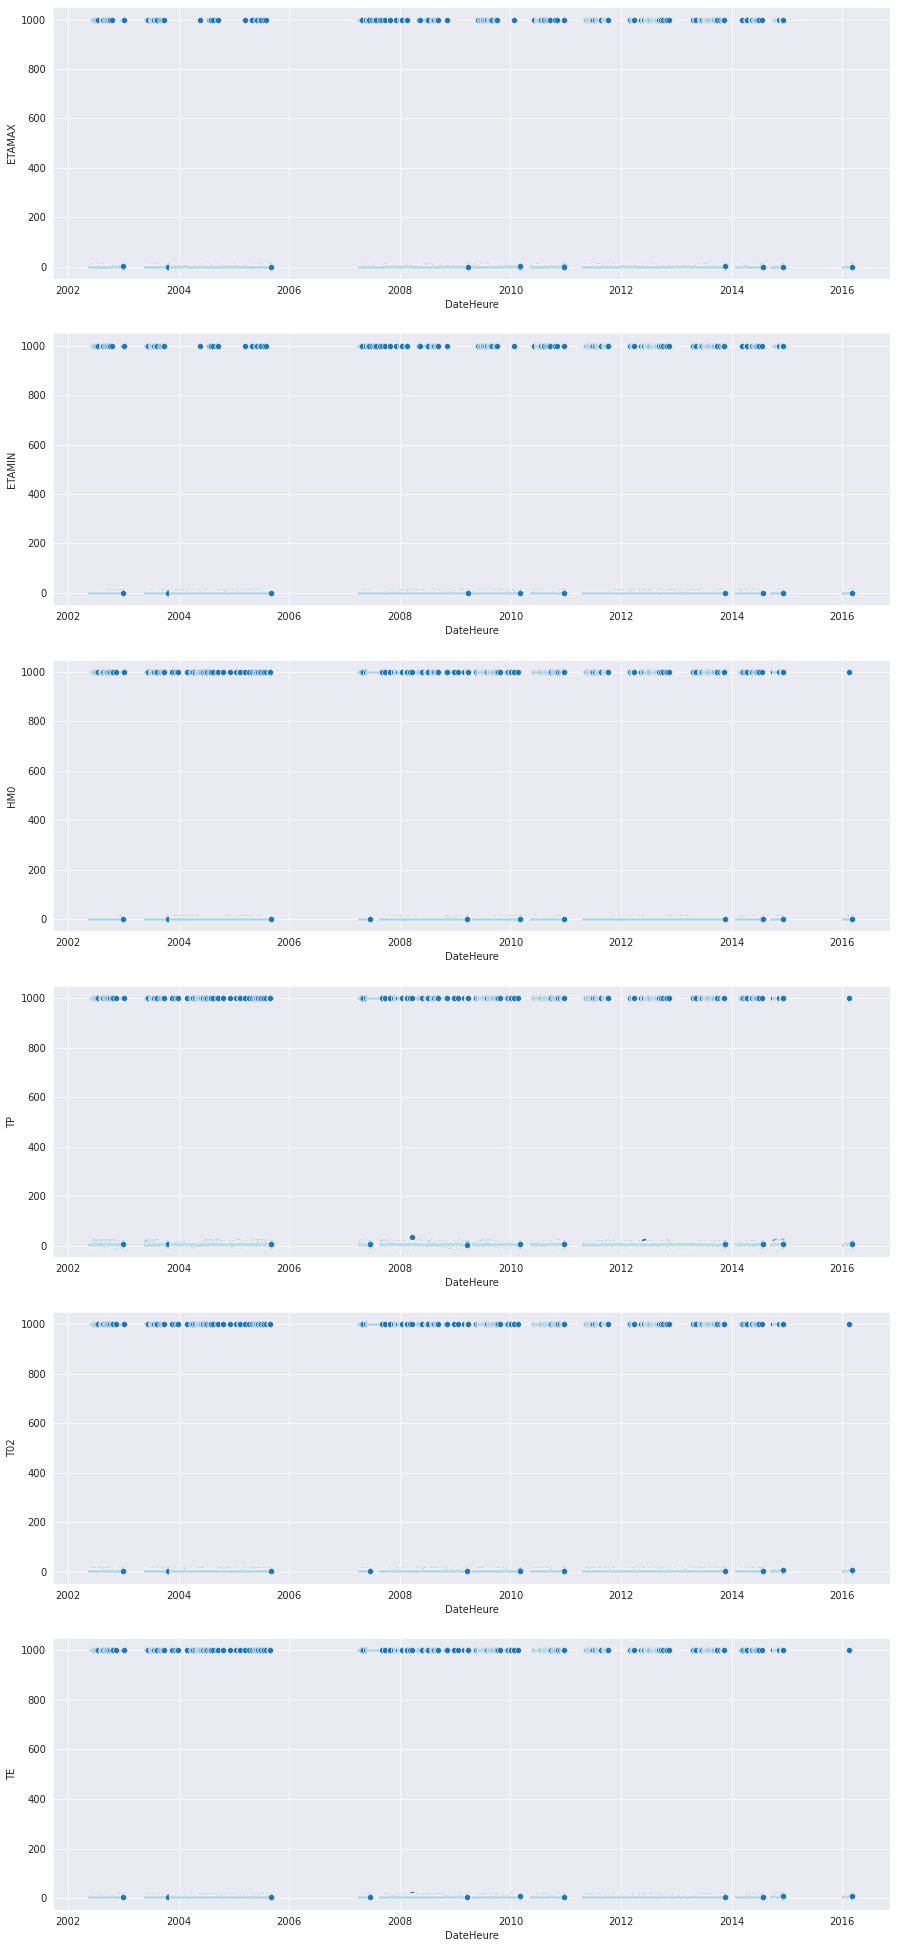

In [ ]:
# parameter of the subplots
fig, ax = plt.subplots(wave_df.shape[1] - 1, figsize = (15, 5*wave_df.shape[1]))
# plot the parameters
for ind in range(len(col_sel) - 1):
    sns.scatterplot(data = wave_df, x= "DateHeure", y = col_sel[ind+1], ax = ax[ind])

## Analysis
we can see that all parameters have outliers (or probably erronous values) that correspond to 999.999, so we are gonna delete all cells with 1000 value.

In [ ]:
# replace outliers with nan values using where function
wave_df.iloc[:,1:] = wave_df.iloc[:, 1:].where(wave_df.iloc[:,1:] < 999, np.nan)

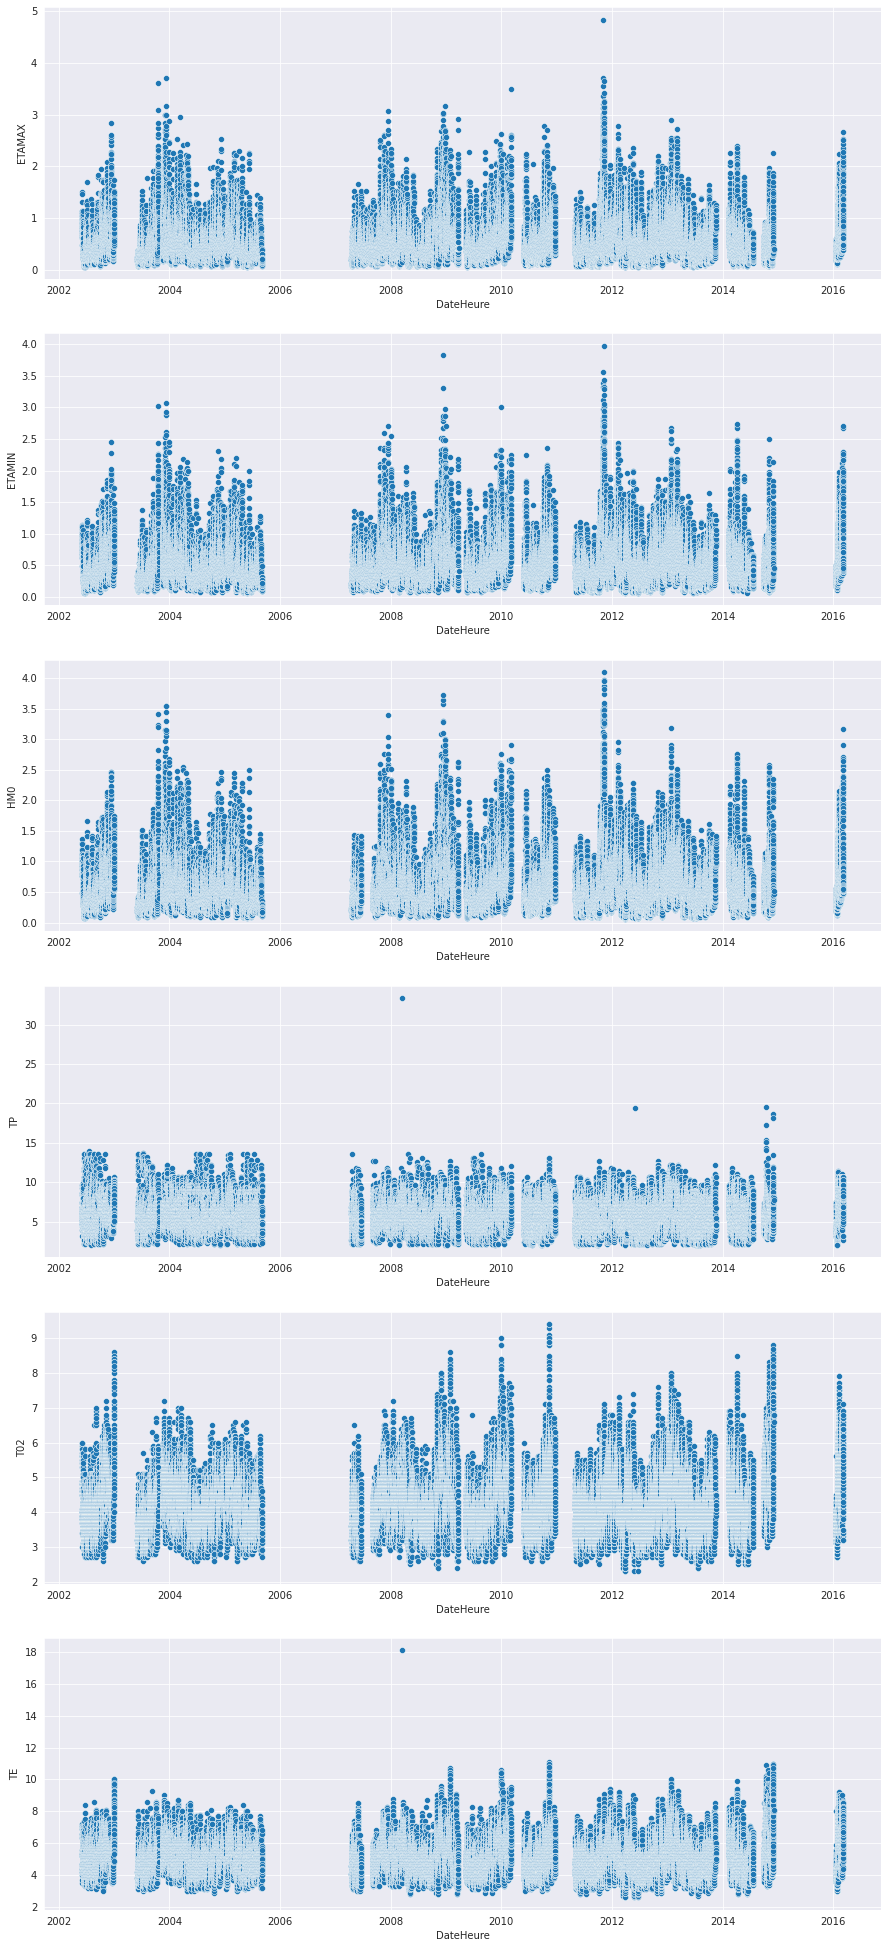

In [ ]:
# parameter of the subplots
fig, ax = plt.subplots(wave_df.shape[1] - 1, figsize = (15, 5*wave_df.shape[1]))
# plot the parameters
for ind in range(len(col_sel) - 1):
    sns.scatterplot(data = wave_df, x= "DateHeure", y = col_sel[ind+1], ax = ax[ind])

## Analysis
We can observe from the data that :
- we have missing data on 2005 and 2015
- the variables have cyclical caractersitc
- the max (ETAMAX) and min (ETAMIN) level of the sea are correlated with significant wave height (HM0)

In [ ]:
# we observe that our data are not hourly on all the range of obervations
# so we will restructure it
wave_df = wave_df.resample("1H", label='right', closed='right', on="DateHeure").mean()

## Saving the data

In [ ]:
wave_df.to_csv("../data/treated_data/Nice/Nice_wave_hourly.csv", index=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=034ba23b-0285-4205-883f-43cc7265b20a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>